In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from py_pol import degrees, np
from py_pol.jones_vector import Jones_vector, create_Jones_vectors

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

## Create arrays

In [4]:
# Create several objectsat once
print(create_Jones_vectors(['E1', 'E2', 'E3']))

print(create_Jones_vectors(['E1']))

print(create_Jones_vectors('E1', N=3))

E1, E2, E3 = create_Jones_vectors(['E1', 'E2', 'E3'])
print(E1, E2, E3)

[E1 is empty
, E2 is empty
, E3 is empty
]
E1 is empty

[E1 is empty
, E1 is empty
, E1 is empty
]
E1 is empty
 E2 is empty
 E3 is empty



In [4]:
# From_matrix
M = [[1, 0.5, 0],
    [0, 0.5, 2]]
E = Jones_vector()
E.from_matrix(M)
print(E)


M = [[1, 0.5],
    [0, 0.5],
    [2, 2]]
E.from_matrix(M)
print(E)
# print(E.M)

M = [1, 0]
E.from_matrix(M)
print(E)
# print(E.M)

M = [[[1, 2, 2.5], [3, 4, 4.5]],
    [[5, 6, 6.5], [7, 8, 8.5]]]
E.from_matrix(M)
print(E)
print(E.parameters.intensity())

E = 
[+1.000]   [+0.500]   [+0.000]   
[+0.000]   [+0.500]   [+2.000]   

E = 
[+1.000]   [+0.000]   [+2.000]   
[+0.500]   [+0.500]   [+2.000]   

E = 
[+1.000]   
[+0.000]   

E Ex = 
[[1.  2.  2.5]
 [3.  4.  4.5]]
E Ey = 
[[5.  6.  6.5]
 [7.  8.  8.5]]

[[26.  40.  48.5]
 [58.  80.  92.5]]


In [5]:
print(E.clear())

E is empty



In [6]:
# From_temporal
t = np.linspace(0,2*np.pi, 50)
Ex = 2 * np.cos(t)
Ey = 3 * np.cos(t+np.pi)
E = Jones_vector('Electric field')
E.from_distribution(Ex, Ey)
print(E)

Ex = [2 * np.cos(t), 4 * np.cos(t+np.pi/2)]
E.from_distribution(Ex, Ey)

Ex = [2 * np.cos(t), 4 * np.cos(t-np.pi/2)]
Ey = [2 * np.cos(t), 4 * np.cos(t+np.pi/2)]
E.from_distribution(Ex, Ey)
print(E)

E.from_distribution(Ex, Ey, method='fit') # Aun no funciona
print(E)

Ex = 3 * np.cos(t+np.pi)
Ey = [[Ex, Ex, Ex], [Ex, Ex, Ex]]
E.from_distribution(Ex, Ey)
print(E)

Electric field = 
[+2.000+0.000j]   
[-0.000-3.000j]   

Electric field = 
[+2.000+0.000j]   [-0.000-3.998j]   
[+2.000+0.000j]   [+0.000+3.998j]   

Electric field = 
[+0.080+0.048j]   [+0.000+0.000j]   
[+0.080+0.048j]   [+0.011+0.000j]   

Electric field Ex = 
[[-0.-3.j -0.-3.j -0.-3.j]
 [-0.-3.j -0.-3.j -0.-3.j]]
Electric field Ey = 
[[-0.-3.j -0.-3.j -0.-3.j]
 [-0.-3.j -0.-3.j -0.-3.j]]



In [7]:
# Linear light
amplitude = [1, 0.5, 0]
angle = [0, 90*degrees, 180*degrees]
E = Jones_vector()
E.linear_light(amplitude, angle)
print(E)

amplitude = [[1, 0.5], [2, 0]]
E.linear_light(amplitude)
print(E)
# print(E.parameters.intensity())

E.linear_light(length=5, global_phase=1)
print(E)

E.linear_light()
print(E)

E = 
[+1.000]   [+0.000]   [-1.000]   
[+0.000]   [+1.000]   [+0.000]   

E = 
[+1.000]   
[+0.000]   

E = 
[+0.540+0.841j]   [+0.540+0.841j]   [+0.540+0.841j]   [+0.540+0.841j]   [+0.540+0.841j]   
[+0.000+0.000j]   [+0.000+0.000j]   [+0.000+0.000j]   [+0.000+0.000j]   [+0.000+0.000j]   

E = 
[+1.000]   
[+0.000]   



d:\codigo_ucm\py_pol\py_pol\jones_vector.py:453: ComplexWarning: Casting complex values to real discards the imaginary part
  self.M = np.array(self.M, dtype=float)


In [8]:
# Circular light
amplitude = [1, 0.5, 0]
E = Jones_vector()
E.circular_light(amplitude=amplitude)
print(E)

amplitude = [1, 0.5, 0]
phase = [1, 0.5, 0]
E.circular_light(amplitude=amplitude, global_phase = phase)
print(E)

E.circular_light(length=5)
print(E)

E.circular_light()
print(E)

E = 
[+0.707+0.000j]   
[+0.000+0.707j]   

E = 
[+0.382+0.595j]   [+0.621+0.339j]   [+0.707+0.000j]   
[-0.595+0.382j]   [-0.339+0.621j]   [+0.000+0.707j]   

E = 
[+0.707+0.000j]   [+0.707+0.000j]   [+0.707+0.000j]   [+0.707+0.000j]   [+0.707+0.000j]   
[+0.000+0.707j]   [+0.000+0.707j]   [+0.000+0.707j]   [+0.000+0.707j]   [+0.000+0.707j]   

E = 
[+0.707+0.000j]   
[+0.000+0.707j]   



In [9]:
# General azimuth ellipticity
az = [1, np.nan, 0]
el = [0, -45*degrees, 90*degrees]
E = Jones_vector()
E.general_azimuth_ellipticity(az, el)
print(E)

az = [1, 0.5, 0]
E.general_azimuth_ellipticity(az)
print(E)

E.general_azimuth_ellipticity(length=5, global_phase=1)
print(E)

E.general_azimuth_ellipticity()
print(E)

E = 
[+0.540+0.000j]   [+0.707+0.000j]   [+0.000+0.000j]   
[+0.841+0.000j]   [+0.000-0.707j]   [+0.000+1.000j]   

E = 
[+0.540]   [+0.878]   [+1.000]   
[+0.841]   [+0.479]   [+0.000]   

E = 
[+0.540+0.841j]   [+0.540+0.841j]   [+0.540+0.841j]   [+0.540+0.841j]   [+0.540+0.841j]   
[+0.000+0.000j]   [+0.000+0.000j]   [+0.000+0.000j]   [+0.000+0.000j]   [+0.000+0.000j]   

E = 
[+1.000]   
[+0.000]   



In [10]:
# General charac angles
alpha = [45*degrees, 90*degrees, 45*degrees]
delay = [0, 45*degrees, 90*degrees]
E = Jones_vector()
E.general_charac_angles(alpha, delay)
print(E)

alpha = [1, 0.5, 0]
E.general_charac_angles(alpha)
print(E)

E.general_charac_angles(length=5, global_phase=1)
print(E)

E.general_charac_angles()
print(E)

E = 
[+0.707+0.000j]   [+0.000-0.000j]   [+0.500-0.500j]   
[+0.707+0.000j]   [+0.924+0.383j]   [+0.500+0.500j]   

E = 
[+0.540]   [+0.878]   [+1.000]   
[+0.841]   [+0.479]   [+0.000]   

E = 
[+0.540+0.841j]   [+0.540+0.841j]   [+0.540+0.841j]   [+0.540+0.841j]   [+0.540+0.841j]   
[+0.000+0.000j]   [+0.000+0.000j]   [+0.000+0.000j]   [+0.000+0.000j]   [+0.000+0.000j]   

E = 
[+1.000]   
[+0.000]   



## Parameters

The elctric field components of E are (V/m):
  Ex (V/m)
[1.+0.j 2.+0.j 0.+0.j 1.+4.j]
  Ey (V/m)
[1.+0.j 2.+0.j 3.+0.j 0.+4.j]
The mean value of param Ex (V/m) is (1+1j) +- 1.8708286933869707
The mean value of param Ey (V/m) is (1.5+1j) +- 2.0615528128088303

The elctric field components of E are (V/m):
  Ex (V/m)
[[1.+0.j 2.+0.j]
 [0.+0.j 1.+4.j]]
  Ey (V/m)
[[1.+0.j 2.+0.j]
 [3.+0.j 0.+4.j]]
The mean value of param Ex (V/m) is (1+1j) +- 1.8708286933869707
The mean value of param Ey (V/m) is (1.5+1j) +- 2.0615528128088303

The elctric field components of E are (V/m):
  Ex (V/m)
[[1.+0.j 2.+0.j]
 [0.+0.j 1.+4.j]]
  Ey (V/m)
[[1.+0.j 2.+0.j]
 [3.+0.j 0.+4.j]]
The mean value of param Ex (V/m) is (1+1j) +- 1.8708286933869707
The mean value of param Ey (V/m) is (1.5+1j) +- 2.0615528128088303

The elctric field components of E are (V/m):
  Ex (V/m)
1
  Ey (V/m)
1



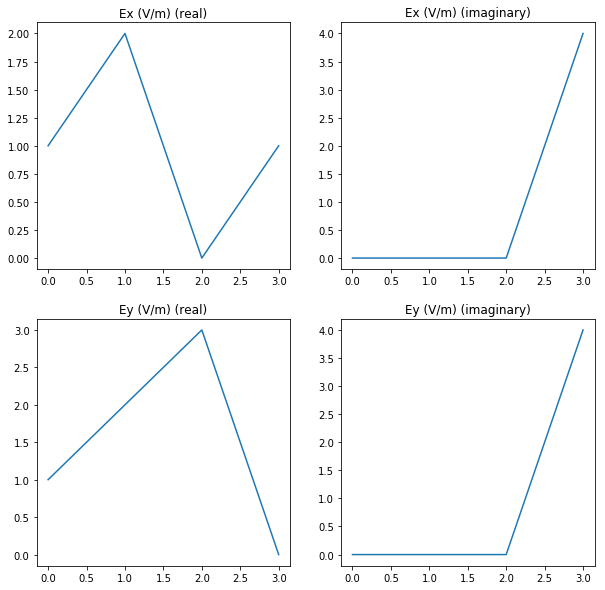

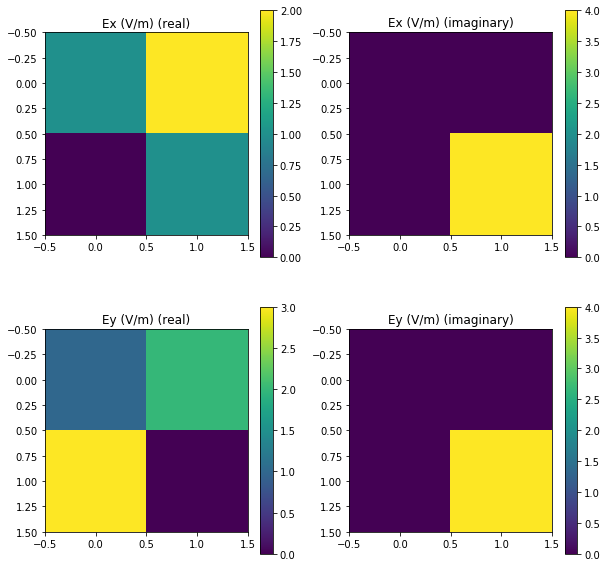

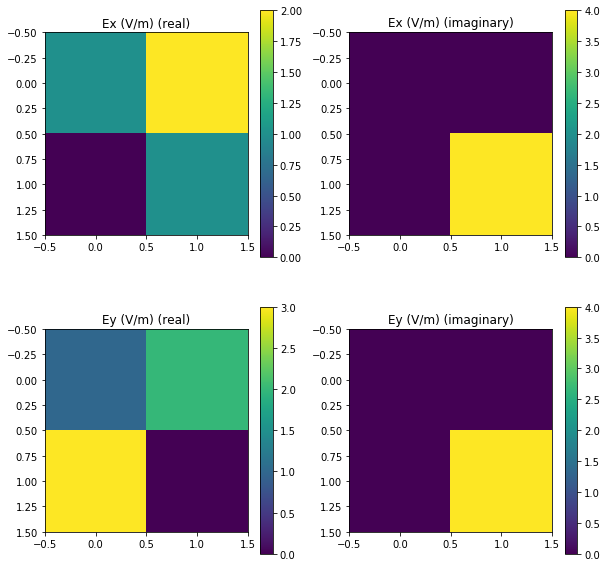

In [11]:
# Field components
M = np.array([[1, 2, 0, 1+4j], [1, 2, 3, 4j]])
E = Jones_vector()
E.from_matrix(M)
I = E.parameters.components(verbose=True, draw=True)
I = E.parameters.components(verbose=True, draw=True, shape=(2,2))
I = E.parameters.components(verbose=True, draw=True, shape_like=np.identity(2))

M = np.array([[1], [1]])
E.from_matrix(M)
I = E.parameters.components(verbose=True)

The elctric field amplitudes of E are (V/m):
  Ex (V/m)
[1. 2. 0. 4.]
  Ey (V/m)
[1. 2. 3. 4.]
The mean value of param Ex (V/m) is 1.75 +- 1.479019945774904
The mean value of param Ey (V/m) is 2.5 +- 1.118033988749895

The elctric field amplitudes of E are (V/m):
  Ex (V/m)
[[1. 2.]
 [0. 4.]]
  Ey (V/m)
[[1. 2.]
 [3. 4.]]
The mean value of param Ex (V/m) is 1.75 +- 1.479019945774904
The mean value of param Ey (V/m) is 2.5 +- 1.118033988749895

The elctric field amplitudes of E are (V/m):
  Ex (V/m)
[[1. 2.]
 [0. 4.]]
  Ey (V/m)
[[1. 2.]
 [3. 4.]]
The mean value of param Ex (V/m) is 1.75 +- 1.479019945774904
The mean value of param Ey (V/m) is 2.5 +- 1.118033988749895

The elctric field amplitudes of E are (V/m):
  Ex (V/m)
1.0
  Ey (V/m)
1.0



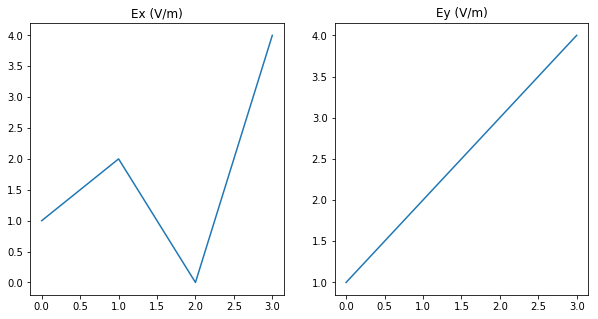

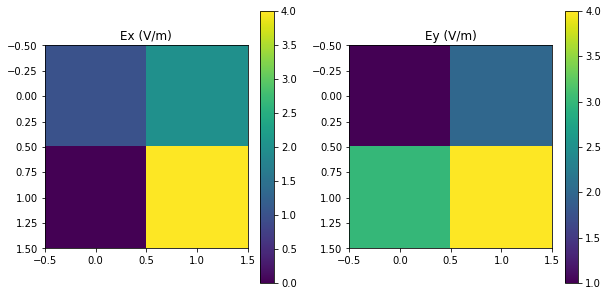

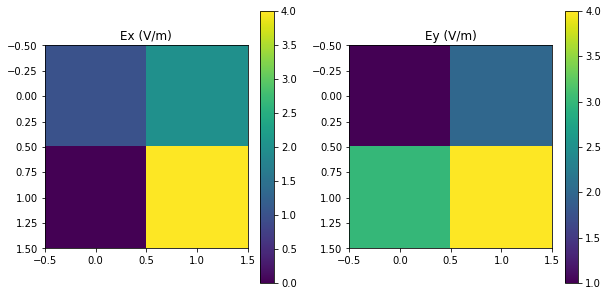

In [12]:
# Field amplitude
M = np.array([[1, 2, 0, 4j], [1, 2j, 3, 4j]])
E = Jones_vector()
E.from_matrix(M)
I = E.parameters.amplitudes(verbose=True, draw=True)
I = E.parameters.amplitudes(verbose=True, draw=True, shape=(2,2))
I = E.parameters.amplitudes(verbose=True, draw=True, shape_like=np.identity(2))

M = np.array([[1], [1j]])
E.from_matrix(M)
I = E.parameters.amplitudes(verbose=True)

The intensity of E is (a.u.):
The mean value is 12.750000000000002 +- 11.43186336517368

The intensity of E is (a.u.):
The mean value is 12.750000000000002 +- 11.43186336517368

The intensity of E is (a.u.):
The mean value is 12.750000000000002 +- 11.43186336517368



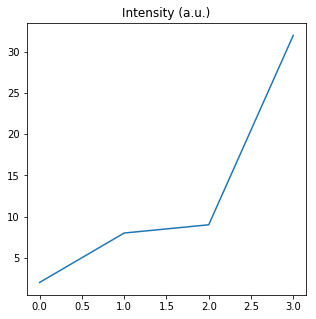

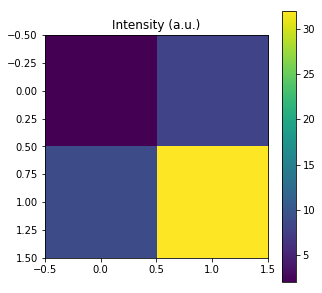

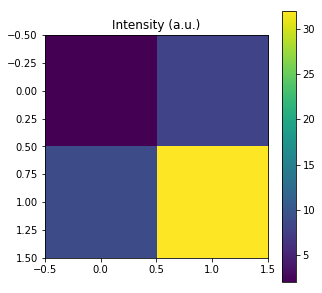

In [13]:
# Intensity
M = np.array([[1, 2, 0, 4j], [1, 2, 3, 4j]])
E = Jones_vector()
E.from_matrix(M)
I = E.parameters.intensity(True, draw=True)
I = E.parameters.intensity(True, draw=True, shape=(2,2))
I = E.parameters.intensity(True, draw=True, shape_like=np.identity(2))

M = np.array([[1], [1]])
E = Jones_vector()
E.from_matrix(M)
I = E.parameters.intensity(True)

The irradiance of E is (W/m^2):
[0.   0.   0.   0.03]
The mean value is 0.009822459208888721 +- 0.011492271967193348

The irradiance of E is (W/m^2):
[[0.   0.  ]
 [0.   0.03]]
The mean value is 0.009822459208888721 +- 0.011492271967193348

The irradiance of E is (W/m^2):
[[0.   0.  ]
 [0.   0.03]]
The mean value is 0.009822459208888721 +- 0.011492271967193348

The irradiance of E is (W/m^2):
[0.]



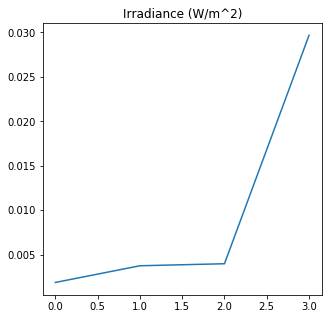

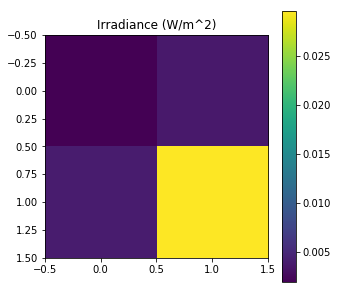

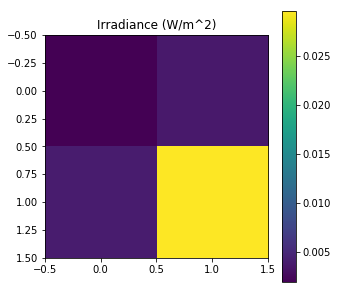

In [14]:
# Irradiance
M = np.array([[1, 2, 0, 10j], [1, 2, 3, 20]])
E = Jones_vector()
E.from_matrix(M)
I = E.parameters.irradiance(verbose=True, draw=True)
I = E.parameters.irradiance(verbose=True, draw=True, shape=(2,2))
I = E.parameters.irradiance(verbose=True, draw=True, shape_like=np.identity(2))

M = np.array([[1], [1]])
E = Jones_vector()
E.from_matrix(M)
I = E.parameters.irradiance(verbose=True)

The ratio angle between electric field amplitudes of E is (deg.):
The mean value is 38.855017059026 +- 37.7560807114526

The ratio angle between electric field amplitudes of E is (deg.):
Low dimensionality, figure not available.



d:\codigo_ucm\py_pol\py_pol\jones_vector.py:1827: RuntimeWarning: divide by zero encountered in true_divide
  alpha = np.arctan(E0y / E0x)


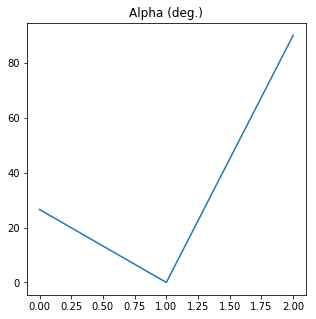

In [15]:
# Alpha
M = np.array([[2, 2, 0], [1, 0, 3]])
E = Jones_vector()
E.from_matrix(M)
alpha = E.parameters.alpha(True, draw=True)

M = np.array([[-1], [1]])
E = Jones_vector()
E.from_matrix(M)
alpha = E.parameters.alpha(True, draw=True)

Delay between electric field components of E is (deg.):
The mean value is 95.31301023541559 +- 92.43777036395416

Delay between electric field components of E is (deg.):
Low dimensionality, figure not available.



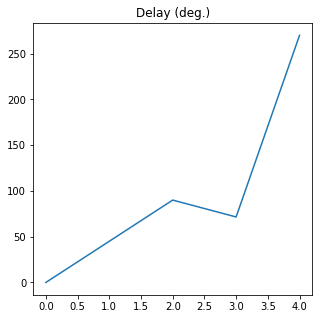

In [16]:
# Delay
M = np.array([[1, 2, 0, 1, 0], [1, 1+1j, 3j, 1+3j, -5j]])
E = Jones_vector()
E.from_matrix(M)
delay = E.parameters.delay(True, draw=True)

M = np.array([[1], [-1]])
E = Jones_vector()
E.from_matrix(M)
delay = E.parameters.delay(True, draw=True)

The characteristic angles of E are:
The mean value of param Alpha (deg.) is 56.754796560918216 +- 23.841535057426775
The mean value of param Delay (deg.) is 45.0 +- 36.742346141747674

The characteristic angles of E are:
Low dimensionality, figure not available.



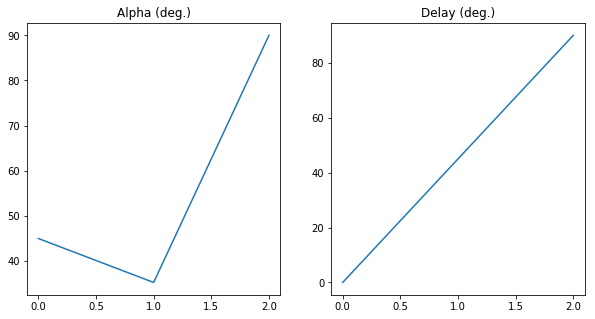

In [17]:
# Caracteristic angles
M = np.array([[1, 2, 0], [1, 1+1j, 3j]])
E = Jones_vector()
E.from_matrix(M)
alpha, delay = E.parameters.charac_angles(True, draw=True)

M = np.array([[1], [1]])
E = Jones_vector()
E.from_matrix(M)
alpha, delay = E.parameters.charac_angles(True, draw=True)

[361, 361]
The characteristic angles of Source 1 are:
The mean value of param Alpha (deg.) is 45.0 +- 26.052830940226055
The mean value of param Delay (deg.) is 179.00207948066696 +- 104.31385012665801



Text(0.5, 1.0, 'Delay orig.')

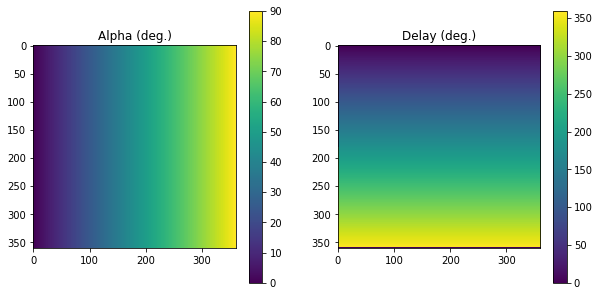

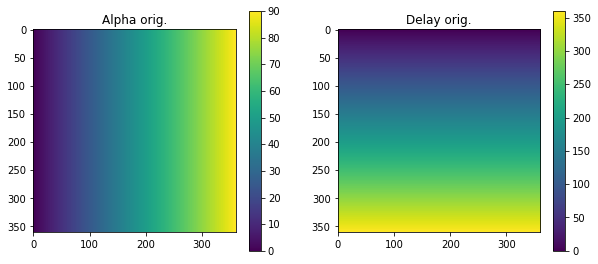

In [18]:
# Check characteristic angles
import matplotlib.pyplot as plt

alpha = np.linspace(0, 90*degrees, 361)
delay = np.linspace(0, 360*degrees, 361)
A, D = np.meshgrid(alpha, delay)

j1 = Jones_vector("Source 1")
j1.general_charac_angles(alpha=A, delay=D)
print(j1.shape)
A2, D2 = j1.parameters.charac_angles(draw=True)
# E0x, E0y = j1.parameters.amplitudes(verbose=True)

fig = plt.figure(figsize=[10, 15])
plt.subplot(3,2,1)
plt.imshow(A/degrees)
plt.colorbar()
plt.title('Alpha orig.')
plt.subplot(3,2,2)
plt.imshow(D/degrees)
plt.colorbar()
plt.title('Delay orig.')

The azimuth of E is (deg.):
The mean value is 67.5 +- 59.4200838612953

The azimuth of E is (deg.):
Low dimensionality, figure not available.



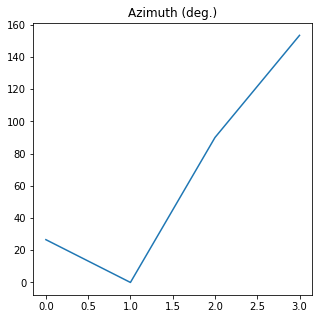

In [19]:
# Azimuth
M = np.array([[2, 2, 0, 2], [1, 0, 3, -1]])
E = Jones_vector()
E.from_matrix(M)
az = E.parameters.azimuth(True, draw=True)

M = np.array([[-1], [-1]])
E = Jones_vector()
E.from_matrix(M)
az = E.parameters.azimuth(True, draw=True)

The ellipticity angle of E is (deg.):
The mean value is 9.0 +- 11.318562471838254

The ellipticity angle of E is (deg.):
Low dimensionality, figure not available.



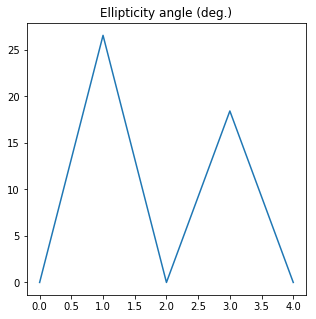

In [20]:
# Ellipticity
M = np.array([[1, 2, 0, 1, 0], [1, 1+1j, 3j, 1+3j, -5j]])
E = Jones_vector()
E.from_matrix(M)
el = E.parameters.ellipticity_angle(True, draw=True)

M = np.array([[1], [-1]])
E = Jones_vector()
E.from_matrix(M)
el = E.parameters.ellipticity_angle(True, draw=True)

The azimuth and ellipticity angles of E are (deg.):
The mean value of param Azimuth (deg.) is 23.313010235415597 +- 20.190194218272445
The mean value of param Ellipticity angle (deg.) is 9.0 +- 11.318562471838254

The azimuth and ellipticity angles of E are (deg.):
Low dimensionality, figure not available.



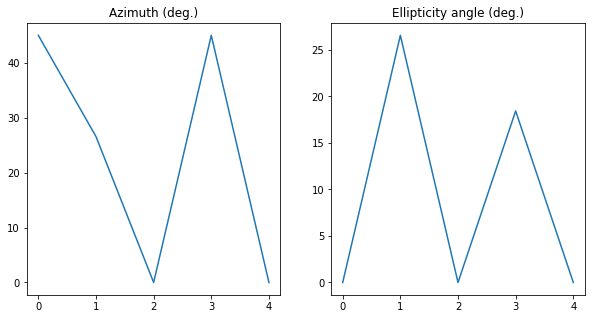

In [21]:
# Azimuth and Ellipticity
M = np.array([[1, 2, 0, 1, 0], [1, 1+1j, 3j, 1+3j, -5j]])
E = Jones_vector()
E.from_matrix(M)
az, el = E.parameters.azimuth_ellipticity(True, draw=True)

M = np.array([[1], [-1]])
E = Jones_vector()
E.from_matrix(M)
az, el = E.parameters.azimuth_ellipticity(True, draw=True)

In [18]:
E = Jones_vector()
az = np.random.rand(10) * 180*degrees
el = (np.random.rand(10) - 0.5) * 90*degrees
gp = np.random.rand(10) * 360*degrees
E.general_azimuth_ellipticity(azimuth=az, ellipticity=el, global_phase=gp)
azimuth, ellipticity = E.parameters.azimuth_ellipticity()
cond = (az == azimuth) * (el == ellipticity)
print('Original az:   ', az/degrees)
print('Calculated az: ', azimuth/degrees)
print('Original el:   ', el/degrees)
print('Calculated el: ', ellipticity/degrees)

Original az:    [112.25 114.54  23.46  95.69  96.65 108.11  13.31 135.65  20.33 176.93]
Calculated az:  [112.25 114.54  23.46  95.69  96.65 108.11  13.31 135.65  20.33 176.93]
Original el:    [-37.29  31.3    0.35  19.38  12.82  31.3    3.33 -42.04   6.61 -24.64]
Calculated el:  [-37.29  31.3    0.35  19.38  12.82  31.3    3.33 -42.04   6.61 -24.64]


In [15]:
E = Jones_vector()
az = np.random.rand(10) * 180*degrees
el = (np.random.rand(10) - 0.5) * 90*degrees
gp = np.random.rand(10) * 360*degrees
E.general_azimuth_ellipticity(azimuth=az, ellipticity=el)

E2 = Jones_vector()
E2.general_azimuth_ellipticity(azimuth=az, ellipticity=el, global_phase=gp)
E2.remove_global_phase()

print(E, E2)

E = 
[+0.572+0.093j]   [+0.745+0.104j]   [+0.548-0.127j]   [-0.206+0.310j]   [+0.632-0.368j]   [+0.416-0.376j]   [-0.572-0.369j]   [+0.853+0.127j]   [+0.627+0.350j]   [-0.681-0.319j]   
[+0.812-0.066j]   [+0.120-0.647j]   [+0.823+0.085j]   [+0.926+0.069j]   [+0.493+0.472j]   [+0.805+0.194j]   [+0.659-0.320j]   [+0.442-0.245j]   [+0.588-0.373j]   [+0.450-0.482j]   
 E = 
[+0.579+0.000j]   [+0.753+0.000j]   [+0.562-0.000j]   [+0.372-0.000j]   [+0.731+0.000j]   [+0.560-0.000j]   [+0.681+0.000j]   [+0.863-0.000j]   [+0.718-0.000j]   [+0.752+0.000j]   
[+0.791-0.196j]   [+0.029-0.658j]   [+0.782+0.269j]   [-0.454-0.809j]   [+0.188+0.656j]   [+0.468+0.684j]   [-0.381+0.626j]   [+0.401-0.308j]   [+0.332-0.612j]   [-0.204+0.627j]   



The azimuth and ellipticity angles of Source 1 are (deg.):
The mean value of param Azimuth (deg.) is 88.21782178217822 +- 52.44829683411962
The mean value of param Ellipticity angle (deg.) is 2.853037001934487e-15 +- 26.239283526803852



Text(0.5, 1.0, 'Ellipticity orig.')

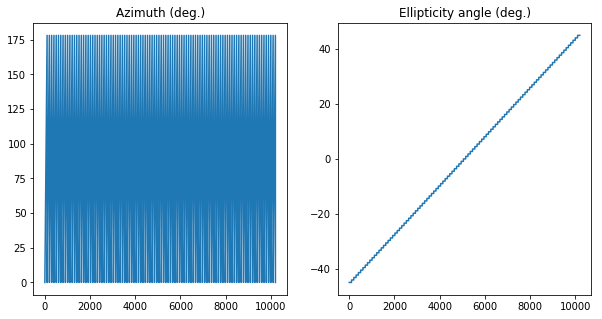

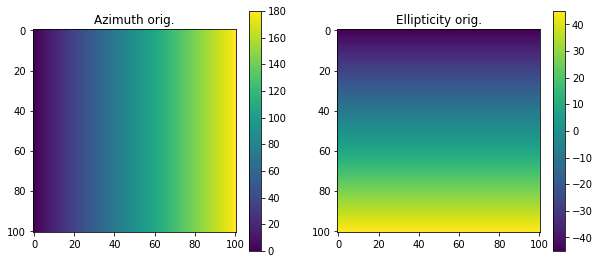

In [22]:
# Check azimuth ellipticity
import matplotlib.pyplot as plt

az = np.linspace(0, 180*degrees, 101)
el = np.linspace(-45*degrees, 45*degrees, 101)
AZ, EL = np.meshgrid(az, el)

j1 = Jones_vector("Source 1")
j1.general_azimuth_ellipticity(azimuth=AZ, ellipticity=EL)
AZ2, EL2 = j1.parameters.azimuth_ellipticity(draw=True)

fig = plt.figure(figsize=[10, 15])
plt.subplot(3,2,1)
plt.imshow(AZ/degrees)
plt.colorbar()
plt.title('Azimuth orig.')
plt.subplot(3,2,2)
plt.imshow(EL/degrees)
plt.colorbar()
plt.title('Ellipticity orig.')

The global phase of E is (deg.):
The mean value is 192.6869897645844 +- 95.77296830075694

The global phase of E is (deg.):
Low dimensionality, figure not available.



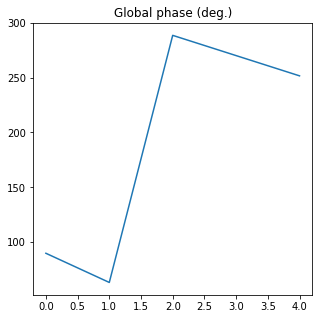

In [23]:
# Global phase
M = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E = Jones_vector()
E.from_matrix(M)
gp = E.parameters.global_phase(True, draw=True)

M = np.array([[1+1j], [-1]])
E = Jones_vector()
E.from_matrix(M)
gp = E.parameters.global_phase(True, draw=True)

The ellipse axes of E are (V/m):
The mean value of param a (V/m) is 2.9748130154266303 +- 1.2847130120179835
The mean value of param b (V/m) is 1.7738768882709857 +- 1.0739463605125004

The ellipse axes of E are (V/m):
Low dimensionality, figure not available.



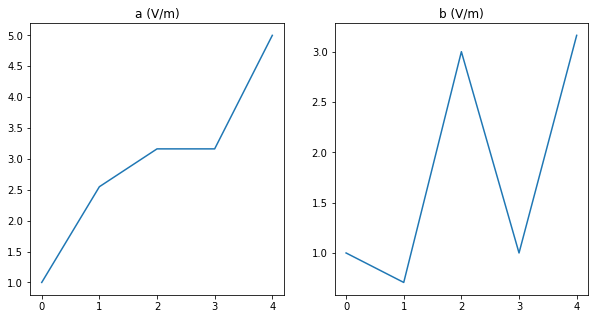

In [24]:
# Ellipse axes
M = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E = Jones_vector()
E.from_matrix(M)
a, b = E.parameters.ellipse_axes(True, draw=True)

M = np.array([[1+1j], [-1]])
E = Jones_vector()
E.from_matrix(M)
a, b = E.parameters.ellipse_axes(True, draw=True)

The ellipticity parameter of E is:
[1.   0.28 0.95 0.32 0.63]
The mean value is 0.6349433388427286 +- 0.30369651272917747

The ellipticity parameter of E is:
Low dimensionality, figure not available.



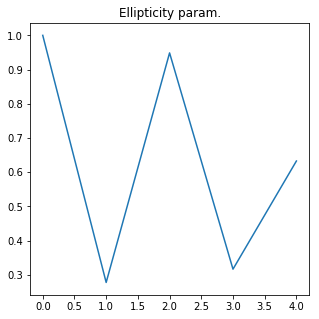

In [25]:
# Ellipticity parameter
M = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E = Jones_vector()
E.from_matrix(M)
e = E.parameters.ellipticity_param(verbose=True, draw=True)

M = np.array([[1+1j], [-1]])
E = Jones_vector()
E.from_matrix(M)
e = E.parameters.ellipticity_param(True, draw=True)

The eccentricity of E is:
[0.   0.96 0.32 0.95 0.77]
The mean value is 0.6000553312278716 +- 0.3801959811470841

The eccentricity of E is:
0.8944271909999157
Low dimensionality, figure not available.



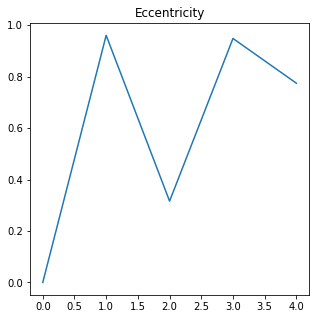

In [26]:
# Eccentricity
M = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E = Jones_vector()
E.from_matrix(M)
e = E.parameters.eccentricity(verbose=True, draw=True)

M = np.array([[1+1j], [-1]])
E = Jones_vector()
E.from_matrix(M)
e = E.parameters.eccentricity(verbose=True, draw=True)

The degree of circular polarization of E is:
[-1.   -0.29  0.32  0.18  0.29]
The mean value is -0.10047846889952153 +- 0.4991125194763017

The degree of circular polarization of E is:
0.6666666666666667
Low dimensionality, figure not available.



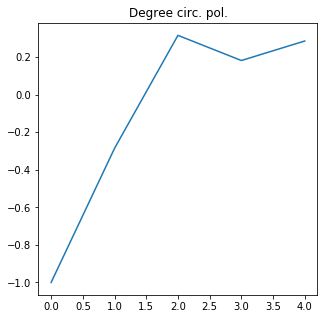

In [27]:
# Degree of circular polarization
M = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E = Jones_vector()
E.from_matrix(M)
dcp = E.parameters.degree_circular_polarization(verbose=True, draw=True)

M = np.array([[1+1j], [-1]])
E = Jones_vector()
E.from_matrix(M)
dcp = E.parameters.degree_circular_polarization(verbose=True, draw=True)

The degree of linear polarization of E is:
[0.   0.96 0.95 0.98 0.96]
The mean value is 0.7697582330251433 +- 0.38504939018213674

The degree of linear polarization of E is:
0.7453559924999298
Low dimensionality, figure not available.



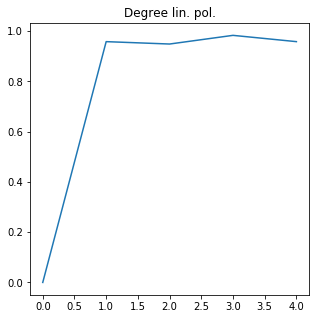

In [28]:
# Degree of linear polarization
M = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E = Jones_vector()
E.from_matrix(M)
dlp = E.parameters.degree_linear_polarization(verbose=True, draw=True)

M = np.array([[1+1j], [-1]])
E = Jones_vector()
E.from_matrix(M)
dlp = E.parameters.degree_linear_polarization(verbose=True, draw=True)

The elctric field components of E are (V/m):
  Ex (V/m)
[ 0.+1.j  1.+2.j  1.-3.j -0.-1.j -1.-3.j]
  Ey (V/m)
[ 1.+0.j  1.+1.j  0.+3.j  1.+3.j -0.-5.j]
The mean value of param Ex (V/m) is (0.2-0.8j) +- 2.172556098240043
The mean value of param Ey (V/m) is (0.6000000000000001+0.4j) +- 2.979932885150268

The elctric field amplitudes of E are (V/m):
  Ex (V/m)
[1.   2.24 3.16 1.   3.16]
  Ey (V/m)
[1.   1.41 3.   3.16 5.  ]
The mean value of param Ex (V/m) is 2.1121246595673098 +- 0.9689837059763577
The mean value of param Ey (V/m) is 2.7152982445082947 +- 1.423782091252089

The intensity of E is (a.u.):
[ 2.  7. 19. 11. 35.]
The mean value is 14.8 +- 11.53082824431966

The intensity of E is (a.u.):
[1.41 2.65 4.36 3.32 5.92]
The mean value is 3.5303136780866753 +- 1.5286874547513407

The irradiance of E is (W/m^2):
[0.   0.   0.01 0.   0.01]
The mean value is 0.004685469272538257 +- 0.0020288899938302506

The ratio angle between electric field amplitudes of E is (deg.):
[45.   32.31 43.49

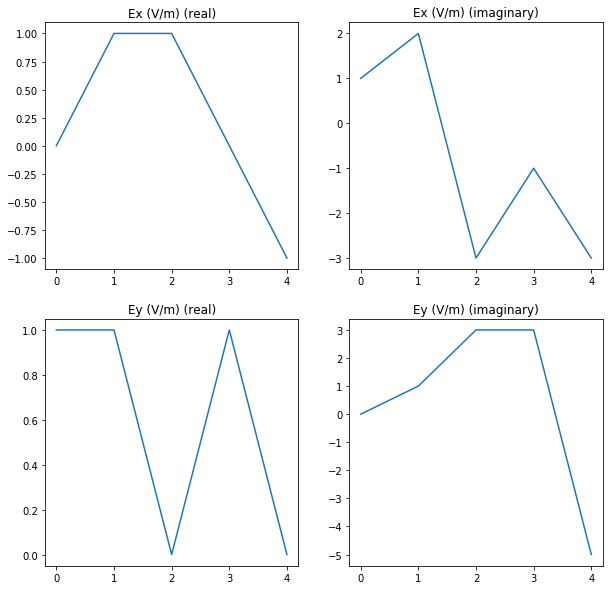

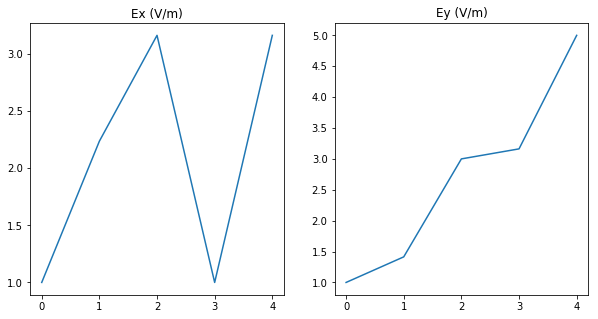

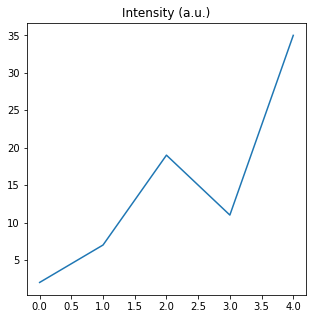

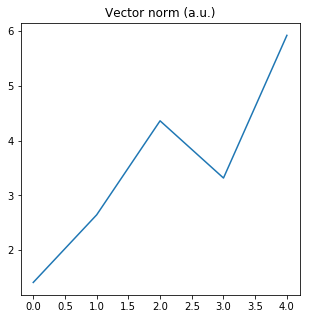

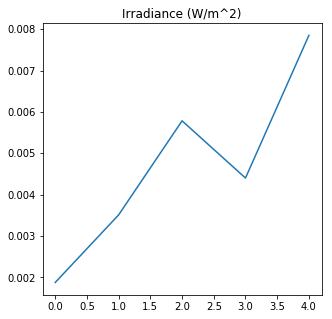

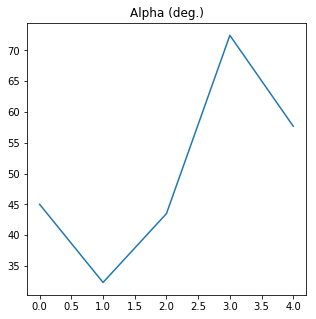

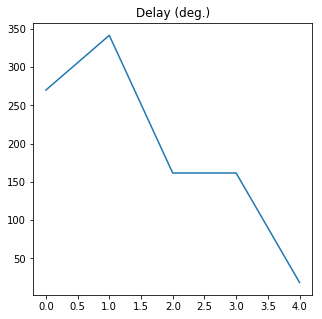

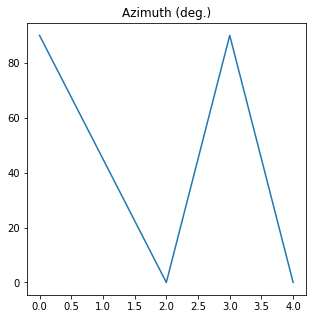

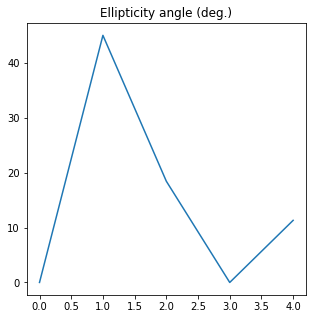

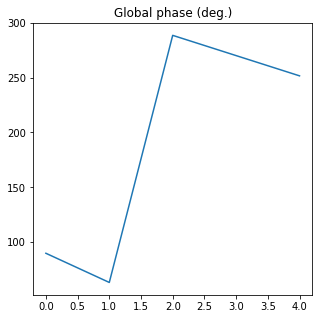

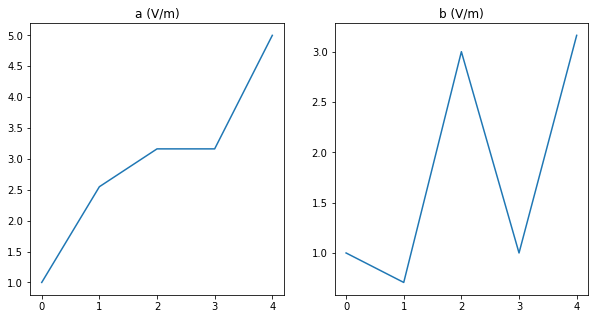

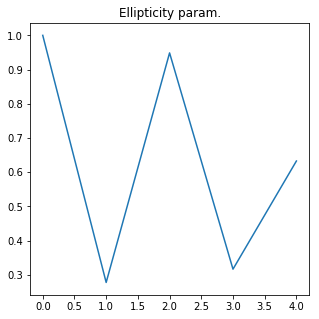

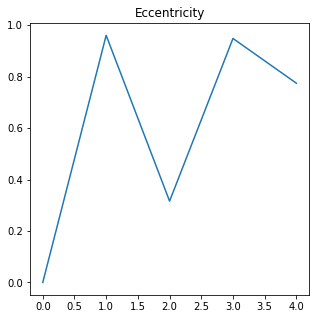

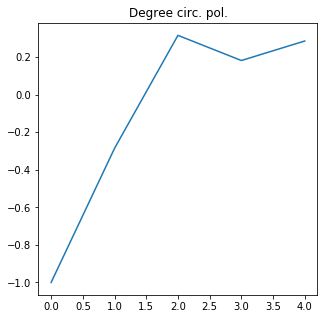

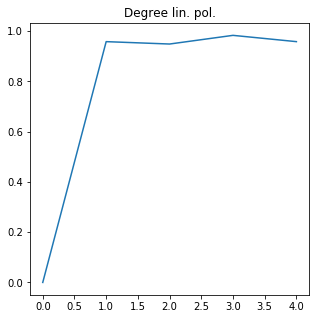

In [29]:
# Get all
M = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E = Jones_vector()
E.from_matrix(M)
print(E.parameters)

E is linearly polarized:
[False False False False False]
The mean value is 0.0 +- 0.0

E is circcularly polarized:
[False False False False False]
The mean value is 0.0 +- 0.0

E is right handed:
[0. 0. 1. 1. 1.]
The mean value is 0.6 +- 0.48989794855663565

E is left handed:
[1. 1. 0. 0. 0.]
The mean value is 0.4 +- 0.48989794855663565




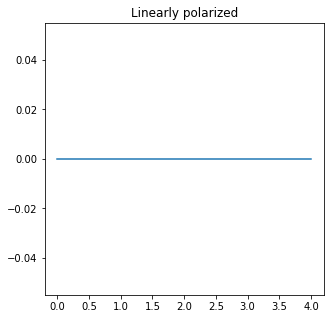

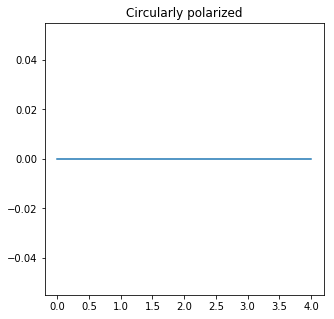

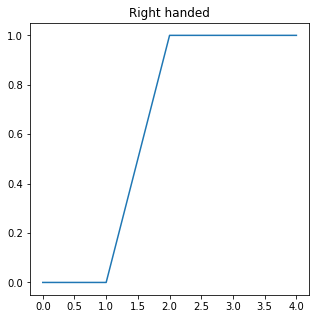

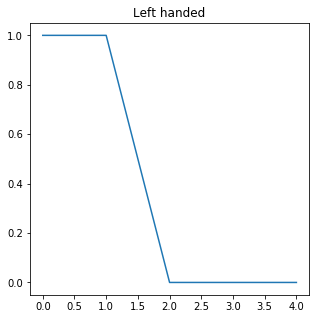

In [30]:
# Checks
M = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E = Jones_vector()
E.from_matrix(M)
print(E.checks)

Source 1 is right handed:
The mean value is nan +- nan



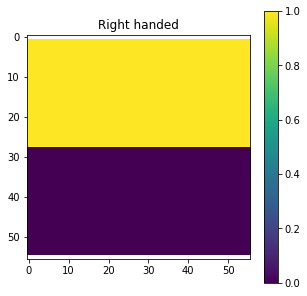

In [31]:
alpha = np.linspace(45*degrees, 45*degrees, 56)
delay = np.linspace(0, 360*degrees, 56)
Alpha, Delay = np.meshgrid(alpha, delay)

j1 = Jones_vector("Source 1")
j1.general_charac_angles(alpha=Alpha, delay=Delay)
_ = j1.checks.is_right_handed(draw=True)


## Operations

In [32]:
# Sum
M1 = np.array([[1j], [1]])
E1 = Jones_vector()
E1.from_matrix(M1)
M2 = np.array([[-1-3j], [-5j]])
E2 = Jones_vector()
E2.from_matrix(M2)
print(E1+E2)

M1 = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E3 = Jones_vector()
E3.from_matrix(M1)
M2 = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E4 = Jones_vector()
E4.from_matrix(M2)
print(E3+E4)

print(E1+E4)

E + E = 
[-1.000-2.000j]   
[+1.000-5.000j]   

E + E = 
[+0.000+2.000j]   [+2.000+4.000j]   [+2.000-6.000j]   [-0.000-2.000j]   [-2.000-6.000j]   
[+2.000+0.000j]   [+2.000+2.000j]   [+0.000+6.000j]   [+2.000+6.000j]   [-0.000-10.000j]   

E + E = 
[+0.000+2.000j]   [+1.000+3.000j]   [+1.000-2.000j]   [+0.000+0.000j]   [-1.000-2.000j]   
[+2.000+0.000j]   [+2.000+1.000j]   [+1.000+3.000j]   [+2.000+3.000j]   [+1.000-5.000j]   



In [33]:
# Substraction
M1 = np.array([[1j], [1]])
E1 = Jones_vector()
E1.from_matrix(M1)
M2 = np.array([[-1-3j], [-5j]])
E2 = Jones_vector()
E2.from_matrix(M2)
print(E1-E2)

M1 = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E3 = Jones_vector()
E3.from_matrix(M1)
M2 = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E4 = Jones_vector()
E4.from_matrix(M2)
print(E3-E4)

print(E1-E4)

E - E = 
[+1.000+4.000j]   
[+1.000+5.000j]   

E - E = 
[+0.000]   [+0.000]   [+0.000]   [+0.000]   [+0.000]   
[+0.000]   [+0.000]   [+0.000]   [+0.000]   [+0.000]   

E - E = 
[+0.000+0.000j]   [-1.000-1.000j]   [-1.000+4.000j]   [+0.000+2.000j]   [+1.000+4.000j]   
[+0.000+0.000j]   [+0.000-1.000j]   [+1.000-3.000j]   [+0.000-3.000j]   [+1.000+5.000j]   



In [34]:
# Multiply by a number
M1 = np.array([[1j], [1]])
E1 = Jones_vector()
E1.from_matrix(M1)
a = 2
print(a*E1)
print(E1*a)
print('')

M1 = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E2 = Jones_vector()
E2.from_matrix(M1)
a = 2
print(a*E2)
print(E2*a)
print('')

M1 = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E3 = Jones_vector()
E3.from_matrix(M1)
a = np.linspace(1, 5, 5)
print(a*E2)
print(E2*a)

E * 2 = 
[+0.000+2.000j]   
[+2.000+0.000j]   

E * 2 = 
[+0.000+2.000j]   
[+2.000+0.000j]   


E * 2 = 
[+0.000+2.000j]   [+2.000+4.000j]   [+2.000-6.000j]   [+0.000-2.000j]   [-2.000-6.000j]   
[+2.000+0.000j]   [+2.000+2.000j]   [+0.000+6.000j]   [+2.000+6.000j]   [+0.000-10.000j]   

E * 2 = 
[+0.000+2.000j]   [+2.000+4.000j]   [+2.000-6.000j]   [+0.000-2.000j]   [-2.000-6.000j]   
[+2.000+0.000j]   [+2.000+2.000j]   [+0.000+6.000j]   [+2.000+6.000j]   [+0.000-10.000j]   


E = 
[+0.000+1.000j]   [+2.000+4.000j]   [+3.000-9.000j]   [+0.000-4.000j]   [-5.000-15.000j]   
[+1.000+0.000j]   [+2.000+2.000j]   [+0.000+9.000j]   [+4.000+12.000j]   [+0.000-25.000j]   

E = 
[+0.000+1.000j]   [+2.000+4.000j]   [+3.000-9.000j]   [+0.000-4.000j]   [-5.000-15.000j]   
[+1.000+0.000j]   [+2.000+2.000j]   [+0.000+9.000j]   [+4.000+12.000j]   [+0.000-25.000j]   



In [35]:
# Divide by a number
M1 = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E1 = Jones_vector()
E1.from_matrix(M1)
a = 2.1
print(E1/a)


M1 = np.array([[1j, 1+2j, 1-3j, -1j, -1-3j], [1, 1+1j, 3j, 1+3j, -5j]])
E1 = Jones_vector()
E1.from_matrix(M1)
a = np.linspace(1, 5, 5)
print(E1/a)

E / 2.1 = 
[+0.000+0.476j]   [+0.476+0.952j]   [+0.476-1.429j]   [-0.000-0.476j]   [-0.476-1.429j]   
[+0.476+0.000j]   [+0.476+0.476j]   [+0.000+1.429j]   [+0.476+1.429j]   [-0.000-2.381j]   

(5,) (5,)
E = 
[+0.000+1.000j]   [+0.500+1.000j]   [+0.333-1.000j]   [+0.000-0.250j]   [-0.200-0.600j]   
[+1.000+0.000j]   [+0.500+0.500j]   [+0.000+1.000j]   [+0.250+0.750j]   [+0.000-1.000j]   



## Manipulations

In [36]:
# Flip
M = np.random.rand(2,4)
J = Jones_vector()
J.from_matrix(M)
print(J)

J.flip()
print(J)


M = np.random.rand(2,4, 3)
J = Jones_vector()
J.from_matrix(M)
print(J)

J.flip(axis=0)
print(J)

E = 
[+0.581]   [+0.526]   [+0.988]   [+0.463]   
[+0.428]   [+0.007]   [+0.550]   [+0.123]   

Flip of E = 
[+0.463]   [+0.988]   [+0.526]   [+0.581]   
[+0.123]   [+0.550]   [+0.007]   [+0.428]   

E Ex = 
[[0.72 0.82 0.09]
 [0.21 0.66 0.23]
 [0.84 0.92 0.11]
 [0.89 0.66 0.64]]
E Ey = 
[[0.11 0.09 0.86]
 [0.62 0.66 0.14]
 [0.23 0.18 0.46]
 [0.12 0.45 0.06]]

Flip of E Ex = 
[[0.89 0.66 0.64]
 [0.84 0.92 0.11]
 [0.21 0.66 0.23]
 [0.72 0.82 0.09]]
Flip of E Ey = 
[[0.12 0.45 0.06]
 [0.23 0.18 0.46]
 [0.62 0.66 0.14]
 [0.11 0.09 0.86]]



In [37]:
# Sum
M = np.random.rand(2,5)
M2 = np.sum(M, axis=1)
print(M2)
J = Jones_vector('J1')
J.from_matrix(M)
J1 = J.sum(axis=0)
print(J1, '\n\n')

M = np.random.rand(2,3,5)
M2 = np.sum(M, axis=1)
print(M2)
J = Jones_vector('J1')
J.from_matrix(M)
J1 = J.sum(axis=0)
print(J1, '\n\n')

M = np.random.rand(2,3,4,5)
M2 = np.sum(M, axis=(1,2))
print(M2)
J = Jones_vector('J1')
J.from_matrix(M)
J1 = J.sum(axis=[0,1])
print(J1, '\n\n')


M = np.random.rand(2,3,4,5, 6)
M2 = np.sum(M, axis=(2,3))
print(M2)
J = Jones_vector('J1')
J.from_matrix(M)
J1 = J.sum(axis=[1,2])
print(J1, '\n\n')

[1.08 2.96]
Sum of J1 = 
[+1.081]   
[+2.958]   
 


[[1.61 1.34 1.72 1.48 2.59]
 [2.41 1.54 1.29 1.73 1.47]]
Sum of J1 = 
[+1.611]   [+1.345]   [+1.724]   [+1.484]   [+2.593]   
[+2.412]   [+1.543]   [+1.292]   [+1.732]   [+1.471]   
 


[[5.8  5.97 4.58 6.81 7.55]
 [6.27 4.48 5.55 6.24 6.82]]
Sum of J1 = 
[+5.801]   [+5.968]   [+4.583]   [+6.808]   [+7.553]   
[+6.272]   [+4.485]   [+5.555]   [+6.239]   [+6.822]   
 


[[[ 9.49 10.2  12.15 10.28  8.8   8.26]
  [ 9.83 10.88  8.7  10.27  9.37  9.64]
  [11.   10.86  8.56 11.77  9.97 12.34]]

 [[ 9.85  9.73 11.15 10.95  9.57 11.89]
  [ 7.51 11.76  9.23  8.93 12.27  9.42]
  [ 8.14 11.28 12.51 11.39  9.88  8.48]]]
Sum of J1 Ex = 
[[ 9.49 10.2  12.15 10.28  8.8   8.26]
 [ 9.83 10.88  8.7  10.27  9.37  9.64]
 [11.   10.86  8.56 11.77  9.97 12.34]]
Sum of J1 Ey = 
[[ 9.85  9.73 11.15 10.95  9.57 11.89]
 [ 7.51 11.76  9.23  8.93 12.27  9.42]
 [ 8.14 11.28 12.51 11.39  9.88  8.48]]
 




In [38]:
# Rotation
M = np.array([1, 0])
angle = [0*degrees, 45*degrees, 90*degrees, 120*degrees, 135*degrees]
E = Jones_vector('E1')
E.from_matrix(M)
E.rotate(angle, change_name=False)
print(E)


angle = 20*degrees
E = Jones_vector()
E.from_matrix(M)
E2 = E.rotate(angle, change_name=False, keep=True)
E2.name = 'E2'
print(E2, '\n', E)

E1 Ex = 
[ 1.    0.71  0.   -0.5  -0.71]
E1 Ey = 
[0.   0.71 1.   0.87 0.71]

E2 = 
[+0.940]   
[+0.342]   
 
 E = 
[+1.000]   
[+0.000]   



In [39]:
azimuth = np.random.rand(5) * 180 * degrees
a = np.random.rand(5)
b = np.random.rand(5)
(solutionX, solutionY) = (a, b)
j1 = Jones_vector()
j1.elliptical_light(
    azimuth=azimuth, a=a, b=b, kind='l')
proposalX, proposalY = j1.parameters.ellipse_axes()
print(solutionX, proposalX)
print(solutionY, proposalY)

[0.41 0.07 0.77 0.2  0.19] [0.41 0.5  0.77 0.2  0.23]
[0.38 0.5  0.33 0.16 0.23] [0.38 0.07 0.33 0.16 0.19]


In [40]:
# getitem
M = np.random.rand(2, 3, 5)
E = Jones_vector('Test')
E.from_matrix(M)
print(E)

E2 = E[0]
print(E2)

E2 = E[0:3]
print(E2)

E3 = E[1, 1]
print(E3)

E3 = E[0:3, 0:2]
print(E3)

E4 = E[np.linspace(2, 6, 3, dtype=int)]
print(E4)

aux = M[0,:,:] > 0.5
E4 = E[aux]
print(E4)

I = E.parameters.intensity()
cond = I > 0.5
print('Cond = ', cond.dtype)
E2 = E[cond]
print(E2)

Test Ex = 
[[0.99 0.36 0.71 0.73 0.57]
 [0.67 0.23 0.6  0.78 0.39]
 [0.63 0.72 0.67 1.   0.82]]
Test Ey = 
[[0.31 0.51 0.63 0.6  0.45]
 [0.15 0.66 0.76 0.2  0.87]
 [0.72 0.06 0.36 0.28 0.51]]

Test_picked = 
[+0.985]   
[+0.312]   

Test_picked = 
[+0.985]   [+0.364]   [+0.714]   
[+0.312]   [+0.509]   [+0.630]   

Test_picked = 
[+0.233]   
[+0.661]   

Test_picked Ex = 
[[0.99 0.36]
 [0.67 0.23]
 [0.63 0.72]]
Test_picked Ey = 
[[0.31 0.51]
 [0.15 0.66]
 [0.72 0.06]]

Test_picked = 
[+0.714]   [+0.573]   [+0.233]   
[+0.630]   [+0.453]   [+0.661]   

Test_picked Ex = [0.99 0.71 0.73 0.57 0.67 0.6  0.78 0.63 0.72 0.67 1.   0.82]
            Ey = [0.31 0.63 0.6  0.45 0.15 0.76 0.2  0.72 0.06 0.36 0.28 0.51]

Cond =  bool
Test_picked Ex = [0.99 0.71 0.73 0.57 0.6  0.78 0.39 0.63 0.72 0.67 1.   0.82]
            Ey = [0.31 0.63 0.6  0.45 0.76 0.2  0.87 0.72 0.06 0.36 0.28 0.51]



In [41]:
# setitem
M = np.random.rand(2, 3, 5)
E = Jones_vector('Original')
E.from_matrix(M)
print(E)

E2 = Jones_vector()
E2.linear_light()
E3 = E.copy()
E3.name = 'Cambiado'
E3[0] = E2
print(E3)

E2.linear_light()
E3 = E.copy()
E3.name = 'Cambiado'
E3[0:3] = E2
print(E3)

E2.linear_light()
E3 = E.copy()
E3.name = 'Cambiado'
E3[1,1] = E2
print(E3)

E2.linear_light(length=6, shape=[3,2])
E3 = E.copy()
E3.name = 'Cambiado'
E3[0:3,0:2] = E2
print(E3)

E2.linear_light()
E3 = E.copy()
E3.name = 'Cambiado'
E3[0:3,0:2] = E2
print(E3)

E2.linear_light()
E3 = E.copy()
E3.name = 'Cambiado'
E3[np.linspace(2, 6, 3, dtype=int)] = E2
print(E3)

E2.linear_light()
E3 = E.copy()
E3.name = 'Cambiado'
aux = M[0,:,:] > 0.5
E3[aux] = E2
print(E3)

# E3 = E[0:3, 0:2]
# print(E3)

# E4 = E[np.linspace(2, 6, 3, dtype=int)]
# print(E4)

# aux = M[0,:,:] > 0.5
# E4 = E[aux]
# print(E4)

Original Ex = 
[[0.96 0.76 0.07 0.14 0.14]
 [0.96 0.08 0.94 0.15 1.  ]
 [0.91 0.53 0.67 0.2  0.16]]
Original Ey = 
[[0.03 0.2  0.61 0.6  0.39]
 [0.18 0.62 0.65 0.4  0.91]
 [0.71 0.42 0.86 0.08 0.5 ]]

Cambiado Ex = 
[[1.   0.76 0.07 0.14 0.14]
 [0.96 0.08 0.94 0.15 1.  ]
 [0.91 0.53 0.67 0.2  0.16]]
Cambiado Ey = 
[[0.   0.2  0.61 0.6  0.39]
 [0.18 0.62 0.65 0.4  0.91]
 [0.71 0.42 0.86 0.08 0.5 ]]

Cambiado Ex = 
[[1.   1.   1.   0.14 0.14]
 [0.96 0.08 0.94 0.15 1.  ]
 [0.91 0.53 0.67 0.2  0.16]]
Cambiado Ey = 
[[0.   0.   0.   0.6  0.39]
 [0.18 0.62 0.65 0.4  0.91]
 [0.71 0.42 0.86 0.08 0.5 ]]

Cambiado Ex = 
[[0.96 0.76 0.07 0.14 0.14]
 [0.96 1.   0.94 0.15 1.  ]
 [0.91 0.53 0.67 0.2  0.16]]
Cambiado Ey = 
[[0.03 0.2  0.61 0.6  0.39]
 [0.18 0.   0.65 0.4  0.91]
 [0.71 0.42 0.86 0.08 0.5 ]]

Cambiado Ex = 
[[1.   1.   0.07 0.14 0.14]
 [1.   1.   0.94 0.15 1.  ]
 [1.   1.   0.67 0.2  0.16]]
Cambiado Ey = 
[[0.   0.   0.61 0.6  0.39]
 [0.   0.   0.65 0.4  0.91]
 [0.   0.   0.86 0.08 0.5

In [42]:
x = slice(0, 5, None)
print(x.start, x.stop, x.step)

0 5 None


## Tests

Test of the time required to use np.array() even if it is not required.

In [43]:
import time
N = 10000000
a = [0, 1, 2, 3, 1, 1, 1, 1, 1,1,1,1,1,1,1,1,1,1,1,1]
b = np.random.rand(20)

start_time = time.time()
for ind in range(N):
    pass
end_time = time.time()
print('Reference time: {} s'.format(end_time - start_time))

start_time = time.time()
for ind in range(N):
    c = np.array(a)
end_time = time.time()
print('Act time: {} s'.format(end_time - start_time))

start_time = time.time()
for ind in range(N):
    c = np.array(b)
end_time = time.time()
print('Not Act time: {} s'.format(end_time - start_time))

start_time = time.time()
for ind in range(N):
    if isinstance(b, np.ndarray):
        c = np.array(b)
end_time = time.time()
print('Better not Act time: {} s'.format(end_time - start_time))

Reference time: 0.40945935249328613 s
Act time: 16.985069513320923 s
Not Act time: 4.843176603317261 s
Better not Act time: 6.3070595264434814 s


Now, we will test what is faster, the new 2D method or making a for loop with the old method (I will use this one with one element):

In [44]:
import time
N = 100000
M = [1, 0]
a = np.linspace(0, 90*degrees, N)
E = Jones_vector()
E.from_matrix(M)

start_time = time.time()
E2 = E.rotate(a, keep=True)
end_time = time.time()
print('New 2D method: {} s'.format(end_time - start_time))

start_time = time.time()
for angle in a:
    E2 = E.rotate(angle, keep=True, change_name=False)
end_time = time.time()
print('Old 1D method + For loop: {} s'.format(end_time - start_time))

New 2D method: 0.011947154998779297 s
Old 1D method + For loop: 8.188367128372192 s


In [45]:
print(-True)

-1


In [46]:
x = np.linspace(35,85, 11)
x2 = x * np.pi/180
print(x2)
n = 1.52
y = 1 - 2*np.cos(x2) / (np.sqrt(n**2-np.sin(x2)**2) + np.cos(x2))
print(y)
y2 = np.sin(x2 - np.arcsin(np.sin(x2)/n)) / np.sin(x2 + np.arcsin(np.sin(x2)/n))
print(y2)

[0.61 0.7  0.79 0.87 0.96 1.05 1.13 1.22 1.31 1.4  1.48]
[0.26 0.29 0.31 0.34 0.38 0.43 0.49 0.55 0.64 0.74 0.86]
[0.26 0.29 0.31 0.34 0.38 0.43 0.49 0.55 0.64 0.74 0.86]


In [47]:
a = np.random.rand(2,2) + 1j * np.random.rand(2,2)
print(a)
print(np.iscomplex(a))

[[0.17+0.17j 0.49+0.55j]
 [0.35+0.57j 0.98+0.16j]]
[[ True  True]
 [ True  True]]


In [48]:
print('hola {} hola'.format('hey'))

hola hey hola
